<a href="https://colab.research.google.com/github/vietsub00/LEAF_DISEASES_CLASSIFICATION/blob/main/Leaf_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import**

In [ ]:
!pip install efficientnet
!pip install tensorflow-addons=='0.9.1'
import efficientnet.tfkeras as efn

import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import keras
from keras.preprocessing.image import image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization, Input, add
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

import os
import random, re, math
import tensorflow as tf, tensorflow.keras.backend as K
from tensorflow.keras import optimizers

print(tf.__version__)
print(tf.keras.__version__)

from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNet

# import tensorflow_addons as tfa

#for reproducible results
#import random
#seed_value = 13
#random.seed(seed_value)
#np.random.seed(seed_value)
#tf.random.set_seed(seed_value)

     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 1.0MB 8.2MB/s 
2.5.0
2.5.0


## Khám phá dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dir = '/content/gdrive/My Drive/plant-pathology-2020-fgvc7/'
sample_submission = pd.read_csv(dir+"sample_submission.csv")
test = pd.read_csv(dir+"test.csv")
train = pd.read_csv(dir+"train.csv")

In [ ]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
print(len(train))

1821


In [ ]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [ ]:
img_size = 300

Load train images:

In [ ]:
#train_images = []
#for num, name in enumerate(train.image_id):
#  train_images.append(np.asarray(image.load_img(dir+'images/'+name+'.jpg', target_size=(300,300))))
#  if num%200 == 0:
#    print(num,'/ 1821')
#train_images = np.array(train_images)
#train_images.shape

(1365, 2048, 3)


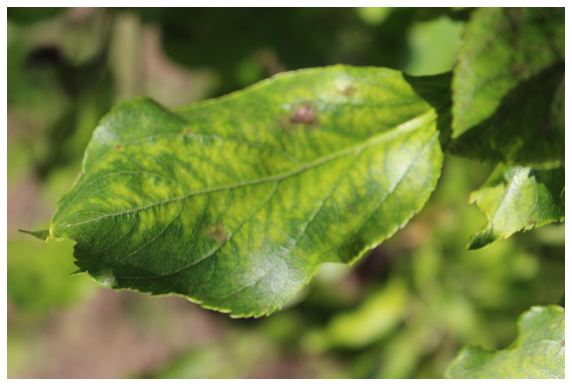

In [ ]:
img_path = dir + 'images/Train_0.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
Y_train = train.drop('image_id',axis=1)
Y_train = np.array(Y_train)
Y_train.shape

(1821, 4)

Read test images:

In [ ]:
#test_images = []
#for num, name in enumerate(test.image_id):
#  test_images.append(np.asarray(image.load_img(dir+'images/'+name+'.jpg', target_size=(300,300))))
#  if num%200 == 0:
#    print(num,'/ 1821')
#test_images = np.array(test_images)
#test_images.shape

(1365, 2048, 3)


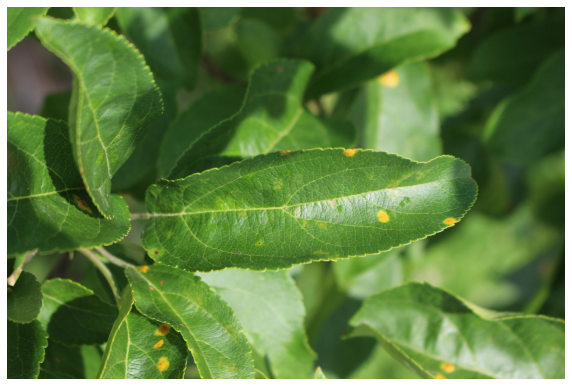

In [ ]:
img_path = dir+'images/Test_0.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img)
plt.show()

## **Tiền xử lý dữ liệu**

In [ ]:
# X = np.ndarray(shape=(len(train_images),img_size,img_size,3),dtype=np.float32)


# for i,image in enumerate(train_images) :
#     X[i] = image
    
    
# X = X/255.0    
# X.shape    

In [ ]:
# X_test = np.ndarray(shape=(len(test_images),img_size,img_size,3),dtype=np.float32)

# for i,image in enumerate(test_images) :
#     X_test[i]=image

# X_test = X_test / 255.0  
# X_test.shape



In [ ]:
#from numpy import save
#train_images = train_images/255.0
#test_images = test_images/255.0
#train_images = train_images.astype('float32')
#test_images = test_images.astype('float32')
#save(dir + 'train_file.npy', train_images)
#save(dir + 'test_file.npy', test_images)

In [ ]:
train_numpy_path = dir + "train_file.npy"
test_numpy_path = dir + "test_file.npy"
X_train = np.load(train_numpy_path)
X_test = np.load(test_numpy_path)

In [ ]:
'''
data_gen = ImageDataGenerator(rotation_range=45,
                              horizontal_flip=True,
                              vertical_flip=True,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range = 0.1,
                              shear_range = 0.1,
                              #brightness_range = [-1.5,1.5],
                              fill_mode = 'reflect',
                              validation_split=0.2 #split train/val
                             )
'''
data_gen = ImageDataGenerator(rotation_range=20,
                              horizontal_flip=True,
                              vertical_flip=True,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range = 0.1,
                              shear_range = 0.1,
                              brightness_range = [-0.1,0.1],
                              fill_mode = 'reflect'
                             )
data_gen.fit(X_train)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

## **Model checkpoint**

In [ ]:
model_vgg_path = dir + 'best_model_vgg.h5'
checkpoint_vgg = ModelCheckpoint(model_vgg_path, monitor = 'val_loss' , mode = 'min', verbose = 1 , save_best_only = True)

model_resnet_path = dir + 'best_model_resnet50.h5'
checkpoint_resnet = ModelCheckpoint(model_resnet_path, monitor = 'val_loss' , mode = 'min', verbose = 1 , save_best_only = True)

model_inception_path = dir + 'best_model_inceptionV3.h5'
checkpoint_inception = ModelCheckpoint(model_inception_path, monitor = 'val_loss' , mode = 'min', verbose = 1 , save_best_only = True)

## **Cài đặt các thuật toán mạng Nơron**

### VGG16

In [ ]:
def construct_model_VGG16() :
    model = Sequential()

    # O layer dau tien phai cho ro input_shape cua image, input_shape = (W, H, D)
    # Convolutional layer chi ro: K(so luong layer/filter), kernel_size=(W,H)
    # model.add(Conv2D(K, (W, H), activation='ten_ham_activation'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(img_size,img_size,3)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000,activation='relu'))
    model.add(Dense(4,activation='softmax'))

    # model.add(Dense(10, activation='softmax'))


    
    #Final Block
    
    # model.add(Flatten())
    # model.add(Dense(512,activation='relu'))
    # model.add(Dropout(0.3))
    # model.add(Dense(256,activation='relu'))
    # model.add(Dense(4,activation='softmax'))
        
    #Compile
    
    # batch_size = 32
    # epochs = 20
    
    model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    #model.fit(X,y,validation_split=0.1,batch_size=batch_size,epochs=epochs)
    
    return model  

In [ ]:
model = construct_model_VGG16()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 300, 300, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 128)     1

In [ ]:
history = model.fit_generator(data_gen.flow(X_train,Y_train,batch_size=32),
                    steps_per_epoch = X_train.shape[0] // 32,
                    epochs = 150,
                    verbose = True,
                    validation_data= (X_val,Y_val),
                    callbacks = [checkpoint_vgg]
                   )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
45/45 [==============================] - 99s 1s/step - loss: 15.0222 - accuracy: 0.3132 - val_loss: 9.5072 - val_accuracy: 0.2877

Epoch 00001: val_loss improved from inf to 9.50724, saving model to /content/gdrive/My Drive/Machine Learning/data/best_model_vgg.h5
Epoch 2/150
45/45 [==============================] - 41s 908ms/step - loss: 1.3366 - accuracy: 0.3209 - val_loss: 9.1004 - val_accuracy: 0.3479

Epoch 00002: val_loss improved from 9.50724 to 9.10036, saving model to /content/gdrive/My Drive/Machine Learning/data/best_model_vgg.h5
Epoch 3/150
45/45 [==============================] - 42s 931ms/step - loss: 1.3028 - accuracy: 0.3357 - val_loss: 5.5872 - val_accuracy: 0.2658

Epoch 00003: val_loss improved from 9.10036 to 5.58722, saving model to /content/gdrive/My Drive/Machine Learning/data/best_model_vgg.h5
Epoch 4/150
45/45 [==============================] - 42s 920ms/step - loss: 1.2797 - accuracy: 0.3462 - val_loss: 1.9914 - val_accuracy: 0.2986

Epoch 00004: va

In [ ]:
model.load_weights('/content/gdrive/My Drive/Machine Learning/data/best_model_vgg.h5')

In [ ]:
predictions = model.predict(X_test)

In [ ]:
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_cnn = pd.DataFrame(results)
df_results_cnn.to_csv('submissionVGG.csv',index=False) #0.926

In [ ]:
model.evaluate(data_gen.flow(X_train,Y_train,batch_size=32))

46/46 [==============================] - 27s 572ms/step - loss: 0.2099 - accuracy: 0.9286


[0.2098686695098877, 0.9285714030265808]

In [ ]:
model.evaluate(X_val,Y_val)

12/12 [==============================] - 3s 247ms/step - loss: 0.1655 - accuracy: 0.9479


[0.16552385687828064, 0.9479451775550842]

In [ ]:
val_preds = model.predict(X_val)

In [ ]:
y_preds = np.argmax(val_preds, axis=1)

In [ ]:
y_preds

array([2, 0, 0, 2, 0, 2, 2, 0, 0, 3, 0, 0, 2, 3, 3, 2, 2, 2, 3, 0, 3, 3,
       1, 0, 3, 2, 0, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2, 0, 3, 2, 2, 3, 3, 0,
       0, 2, 2, 0, 3, 3, 0, 3, 2, 0, 2, 3, 0, 3, 3, 0, 2, 2, 3, 2, 2, 0,
       2, 0, 3, 1, 3, 3, 2, 3, 0, 2, 3, 0, 3, 2, 3, 3, 3, 0, 2, 3, 0, 3,
       2, 0, 2, 2, 3, 0, 2, 0, 0, 3, 3, 3, 0, 2, 2, 1, 0, 2, 3, 0, 0, 0,
       2, 2, 2, 0, 3, 0, 2, 2, 3, 0, 3, 2, 2, 2, 3, 0, 2, 3, 0, 2, 3, 2,
       3, 2, 3, 3, 3, 3, 0, 2, 0, 3, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 0,
       3, 2, 3, 2, 3, 3, 0, 0, 0, 3, 2, 0, 2, 0, 3, 0, 0, 0, 3, 2, 2, 0,
       3, 2, 0, 2, 0, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 0, 0,
       3, 2, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 2, 2, 2, 0, 0, 3, 0, 3, 3,
       3, 0, 2, 2, 3, 3, 3, 3, 0, 2, 3, 3, 3, 0, 0, 3, 0, 0, 2, 0, 3, 1,
       2, 3, 0, 3, 0, 3, 2, 2, 3, 3, 2, 2, 0, 0, 2, 2, 0, 3, 2, 2, 2, 3,
       2, 0, 0, 0, 0, 3, 2, 0, 0, 0, 3, 3, 2, 2, 2, 3, 2, 3, 1, 2, 3, 3,
       0, 3, 0, 3, 0, 0, 2, 2, 3, 0, 0, 2, 2, 0, 0,

In [ ]:
Y_vals = np.argmax(Y_val, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_vals, y_preds)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 99   0   0   1]
 [  1   6   7   4]
 [  1   1 118   0]
 [  4   0   0 123]]


### ResNet 50

In [ ]:
def residual_block(X_start, filters, name, reduce=False, res_conv2d=False):
    nb_filters_1, nb_filters_2, nb_filters_3 = filters
    strides_1 = [2, 2] if reduce else [1, 1]

    X = Conv2D(filters=nb_filters_1, kernel_size=[1, 1], strides=strides_1, padding='same', name=name)(X_start)
    X = BatchNormalization()(X)  # default axis-1 is ok
    X = Activation('relu')(X)

    X = Conv2D(filters=nb_filters_2, kernel_size=[3, 3], strides=[1, 1], padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=nb_filters_3, kernel_size=[1, 1], strides=[1, 1], padding='same')(X)
    X = BatchNormalization()(X)

    if res_conv2d:
        X_res = Conv2D(filters=nb_filters_3, kernel_size=[1, 1], strides=strides_1, padding='same')(X_start)
        X_res = BatchNormalization()(X_res)
    else:
        X_res = X_start

    X = add([X, X_res])
    X = Activation('relu')(X)
    return X

def construct_model_ResNet50() :
    X_input = Input(shape=(img_size,img_size,3))

    # conv1
    X = Conv2D(filters=64, kernel_size=[3, 3], strides=[2, 2], padding='same', name='conv1')(X_input)
    X = BatchNormalization(name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D([3, 3], strides=[2, 2])(X)

    # conv2_x
    X = residual_block(X, filters=[64, 64, 256], name='conv2_a', reduce=False, res_conv2d=True)
    X = residual_block(X, filters=[64, 64, 256], name='conv2_b')
    X = residual_block(X, filters=[64, 64, 256], name='conv2_c')

    # conv3_x
    X = residual_block(X, filters=[128, 128, 512], name='conv3_a', reduce=True, res_conv2d=True)
    X = residual_block(X, filters=[128, 128, 512], name='conv3_b')
    X = residual_block(X, filters=[128, 128, 512], name='conv3_c')
    X = residual_block(X, filters=[128, 128, 512], name='conv3_d')

    # conv4_x
    X = residual_block(X, filters=[256, 256, 1024], name='conv4_a', reduce=True, res_conv2d=True)
    X = residual_block(X, filters=[256, 256, 1024], name='conv4_b')
    X = residual_block(X, filters=[256, 256, 1024], name='conv4_c')
    X = residual_block(X, filters=[256, 256, 1024], name='conv4_d')
    X = residual_block(X, filters=[256, 256, 1024], name='conv4_e')
    X = residual_block(X, filters=[256, 256, 1024], name='conv4_f')
    
    # conv5_x
    X = residual_block(X, filters=[512, 512, 2048], name='conv5_a', reduce=True, res_conv2d=True)
    X = residual_block(X, filters=[512, 512, 2048], name='conv5_b')
    X = residual_block(X, filters=[512, 512, 2048], name='conv5_c')

    X = MaxPooling2D((2, 2), name='avg_pool')(X)
    X = Flatten()(X)
    X = Dense(4, activation='softmax')(X)

    model = Model(inputs=X_input, outputs=X)
    
    model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    
    return model  

In [ ]:
model = construct_model_ResNet50()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 150, 150, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 150, 150, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 150, 150, 64) 0           bn_conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
'''
history = model.fit_generator(data_gen.flow(X_train, Y_train, batch_size=32, subset='training'),
                              steps_per_epoch = X_train.shape[0]*0.8//32,
                              epochs = 150,
                              verbose = True,
                              validation_data= data_gen.flow(X_train, Y_train, batch_size=8, subset='validation'),
                              #validation_steps = X_train.shape[0]*0.2//8,
                              callbacks = [checkpoint_resnet])
'''
history = model.fit_generator(data_gen.flow(X_train,Y_train,batch_size=32),
                    steps_per_epoch = X_train.shape[0] // 32,
                    epochs = 150,
                    verbose = True,
                    validation_data= (X_val,Y_val),
                    callbacks = [checkpoint_vgg]
                   )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
45/45 [==============================] - 74s 800ms/step - loss: 11.7719 - accuracy: 0.3820 - val_loss: 21.8244 - val_accuracy: 0.3288

Epoch 00001: val_loss improved from inf to 21.82440, saving model to /content/gdrive/My Drive/plant-pathology-2020-fgvc7/best_model_vgg.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/150
45/45 [==============================] - 33s 720ms/step - loss: 3.2327 - accuracy: 0.4473 - val_loss: 1.3904 - val_accuracy: 0.2740

Epoch 00002: val_loss improved from 21.82440 to 1.39040, saving model to /content/gdrive/My Drive/plant-pathology-2020-fgvc7/best_model_vgg.h5
Epoch 3/150
45/45 [==============================] - 34s 745ms/step - loss: 5.8187 - accuracy: 0.4235 - val_loss: 11.0671 - val_accuracy: 0.2986

Epoch 00003: val_loss did not improve from 1.39040
Epoch 4/150
45/45 [==============================] - 33s 730ms/step - loss: 2.0231 - accuracy: 0.4803 - val_loss: 210.7835 - val_accuracy: 0.3288

Epoch 00004: val_loss did not improve from 1.39040
Epoch 5/150
45/45 [==============================] - 33s 729ms/step - loss: 2.6028 - accuracy: 0.5267 - val_loss: 255.2202 - val_accuracy: 0.3315

Epoch 00005: val_loss did not improve from 1.39040
Epoch 6/150
45/45 [==============================] - 33s 735ms/step - loss: 1.7000 - accuracy: 0.4916 - val_loss: 1.529

In [ ]:
model.evaluate(data_gen.flow(X_train,Y_train,batch_size=32))

46/46 [==============================] - 26s 544ms/step - loss: 0.4188 - accuracy: 0.8510


[0.4187558889389038, 0.8509615659713745]

In [ ]:
model.evaluate(X_val,Y_val)

12/12 [==============================] - 2s 170ms/step - loss: 0.1644 - accuracy: 0.9452


[0.16435793042182922, 0.9452054500579834]

In [ ]:
predictions = model.predict(X_test)

In [ ]:
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_cnn = pd.DataFrame(results)
df_results_cnn.to_csv(dir + 'submissionResnet50.csv',index=False) #0.926

### Inception V3

In [ ]:
def transfer_learning_InceptionV3() :
    base_model=InceptionV3(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
    base_model.trainable = True
    for layer in base_model.layers[:-3] :
        layer.trainable = True
    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(512,activation='relu')(x)
    x=Dropout(0.3)(x)
    x=Dense(256,activation='relu')(x)
    preds=Dense(4,activation='softmax')(x)
    model=Model(inputs=base_model.input,outputs=preds)
    model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return model  

In [ ]:
model = transfer_learning_InceptionV3()
model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_____________________________

In [ ]:
history = model.fit_generator(data_gen.flow(X_train,Y_train,batch_size=32),
                    steps_per_epoch = X_train.shape[0] // 32,
                    epochs = 150,
                    verbose = True,
                    validation_data= (X_val,Y_val),
                    callbacks = [checkpoint_inception]
                   )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
45/45 [==============================] - 77s 784ms/step - loss: 0.6787 - accuracy: 0.7774 - val_loss: 62.3054 - val_accuracy: 0.3836

Epoch 00001: val_loss improved from inf to 62.30545, saving model to /content/gdrive/My Drive/Machine Learning/data/best_model_inceptionV3.h5
Epoch 2/150
45/45 [==============================] - 31s 674ms/step - loss: 0.3887 - accuracy: 0.8771 - val_loss: 24.2591 - val_accuracy: 0.5863

Epoch 00002: val_loss improved from 62.30545 to 24.25915, saving model to /content/gdrive/My Drive/Machine Learning/data/best_model_inceptionV3.h5
Epoch 3/150
45/45 [==============================] - 32s 702ms/step - loss: 0.3249 - accuracy: 0.9108 - val_loss: 2.0769 - val_accuracy: 0.8164

Epoch 00003: val_loss improved from 24.25915 to 2.07694, saving model to /content/gdrive/My Drive/Machine Learning/data/best_model_inceptionV3.h5
Epoch 4/150
45/45 [==============================] - 31s 672ms/step - loss: 0.3233 - accuracy: 0.9101 - val_loss: 1.7306 - val_a

In [ ]:
model.load_weights(model_inception_path)

In [ ]:
model.evaluate(data_gen.flow(X_train,Y_train,batch_size=32))

46/46 [==============================] - 25s 523ms/step - loss: 0.1506 - accuracy: 0.9554


[0.15057699382305145, 0.9553571343421936]

In [ ]:
model.evaluate(X_val,Y_val)

12/12 [==============================] - 1s 118ms/step - loss: 0.1614 - accuracy: 0.9534


[0.1613815575838089, 0.9534246325492859]

In [ ]:
predictions = model.predict(X_test)

In [ ]:
df_pred  = pd.DataFrame(predictions, columns = ['healthy','multiple_diseases','rust','scab'])
results = {'image_id' : test.image_id,
            'healthy' : df_pred.healthy,
            'multiple_diseases' : df_pred.multiple_diseases,
            'rust' : df_pred.rust,
            'scab' : df_pred.scab
          }
df_results_cnn = pd.DataFrame(results)
df_results_cnn.to_csv('submissionInceptionV3.csv',index=False) #0.926